<a href="https://colab.research.google.com/github/codekali/Neural-SC-Descriptor/blob/master/SecondTrial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Mount google drive, install dependencies and import required packages

In [1]:
from google.colab import drive
drive.mount('/content/drive/')
%cd '/content/drive/My Drive/Transformer/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
/content/drive/My Drive/Transformer


In [21]:
# Install transformers
!pip install transformers

In [22]:
import torch
import torch.optim as optim
import os.path
from os import path
import matplotlib.pyplot as plt
from torch.utils import data
from torch.utils.data import Dataset
from tqdm.notebook import tqdm
from src import utils
from transformers import T5Tokenizer, T5ForConditionalGeneration

model_path = "checkpoint.pth"

# Retrieve training and validation data from google drive

In [23]:
X_train,Y_train = [],[]  
file=open("train/train.token.sbt")
for line in file:
  X_train.append(line)
file=open("train/train.token.nl")
for line in file:
  Y_train.append(line)
# l=int(len(X_train)/10)
X_train = X_train[0:100]
Y_train = Y_train[0:100]
print("Number of Training Example: ", len(X_train))

Number of Training Example:  100


In [25]:
X_valid,Y_valid = [],[]
file=open("val/valid.token.sbt")
for line in file:
  X_valid.append(line)
file=open("val/valid.token.nl")
for line in file:
  Y_valid.append(line)
# l=int(len(X_valid)/2)
X_valid = X_valid[0:20]
Y_valid = Y_valid[0:20]
print("Number of validation Example: ", len(X_valid))

Number of validation Example:  20


# Dataset Class to load data while training and validation

In [26]:
class Dataset(data.Dataset):
  def __init__(self, X_item, Y_item):
    self.X_item=X_item
    self.Y_item=Y_item

  def __len__(self):
    return len(self.X_item)

  def __getitem__(self, index):
    X = self.X_item[index]
    
    Y = self.Y_item[index]
    return X, Y

# Take GPU into action and define batch size and num of workers

In [27]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(">>> ", device)
params = {'batch_size': 4,
          'shuffle': True,
          'num_workers': 2}

params_valid = {'batch_size': 4,
          'shuffle': False,
          'num_workers': 2}

training_set = Dataset(X_train,Y_train)
training_generator = data.DataLoader(training_set, **params)

validation_set = Dataset(X_valid,Y_valid)
validation_generator = data.DataLoader(validation_set, **params_valid)

num_epoch = 20

>>>  cuda


## Load Initial Model and Tokenizer

In [28]:
#load pre-trained model and tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')
model = model.to(device)

#load opptimizer
no_decay = ["bias", "LayerNorm.bias", "LayerNorm.weight"]
optimizer_grouped_parameters = []
lr=2e-5
for key, value in dict(model.named_parameters()).items():
    if value.requires_grad:
        if any(nd in key for nd in no_decay):
            optimizer_grouped_parameters += [
                {"params": [value], "lr": lr, "weight_decay": 0.01}
            ]
        if not any(nd in key for nd in no_decay):
            optimizer_grouped_parameters += [
                {"params": [value], "lr": lr, "weight_decay": 0.0}
            ]
                
optimizer = utils.BertAdam(
            optimizer_grouped_parameters,
            lr=lr,
            warmup=0.1,
            t_total=100,
            schedule='warmup_constant',
        )

# Training variables

loss_train = []
loss_valid = []
trainloss=0
validloss=0
epoch = 0


## Load model, tokenizer, optimizer, trainer, epoch no. and losses from a checkpoint directly or from the saved location.

In [29]:
model_location = "models/" + model_path

if path.exists(model_location):

  #load saved model from the drive
  checkpoint = torch.load(model_location)
  epoch = checkpoint['epoch']
  model.load_state_dict(checkpoint["state_dict"])
  optimizer.load_state_dict(checkpoint['optimizer'])
  loss_train = checkpoint['trainloss']
  loss_valid = checkpoint['validloss']
  print(">>> loaded saved checkpoint from epoch ", epoch)
  model.eval()
  model = model.to(device)

else:
  print(">>> loaded from downloaded model ")

>>> loaded from downloaded model 


## Plot train and valid loss to see the curve

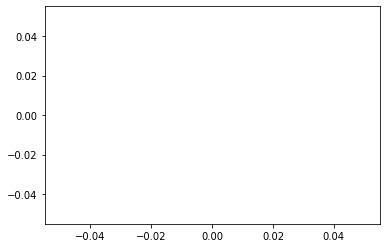

In [30]:
plt.plot(loss_train, color="green")
plt.plot(loss_valid, color="red")
plt.show()

# Training and validation loop

Running EPOCH :  21


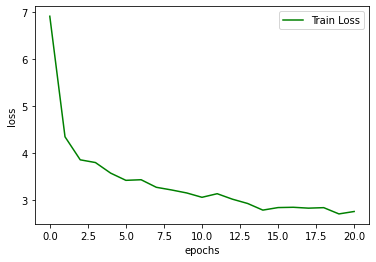

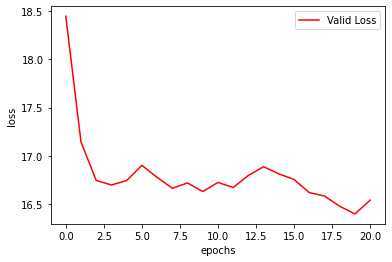


Epoch  21  completed! 
Train loss is:  tensor(2.7540, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.5386, device='cuda:0')


____________________________________________________________________


Running EPOCH :  22


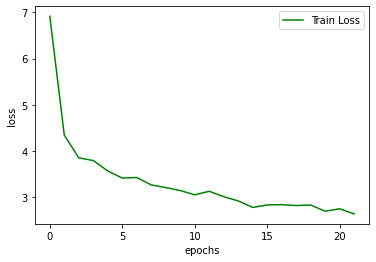

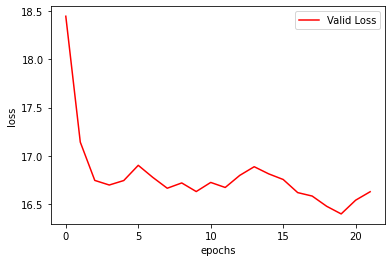


Epoch  22  completed! 
Train loss is:  tensor(2.6436, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.6262, device='cuda:0')


____________________________________________________________________


Running EPOCH :  23


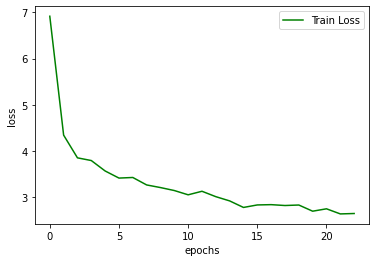

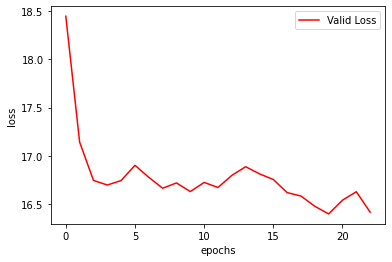


Epoch  23  completed! 
Train loss is:  tensor(2.6524, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.4138, device='cuda:0')


____________________________________________________________________


Running EPOCH :  24


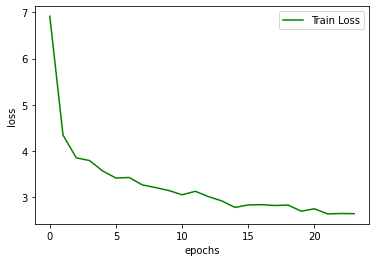

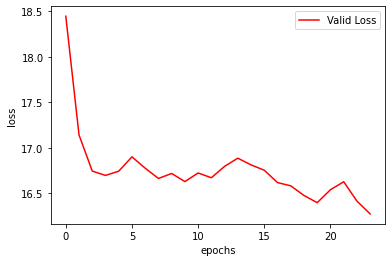


Epoch  24  completed! 
Train loss is:  tensor(2.6482, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2723, device='cuda:0')


____________________________________________________________________


Running EPOCH :  25


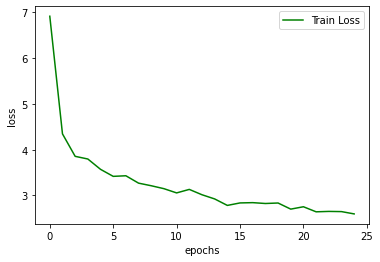

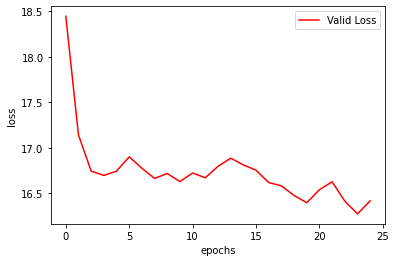


Epoch  25  completed! 
Train loss is:  tensor(2.5976, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.4158, device='cuda:0')


____________________________________________________________________


Running EPOCH :  26


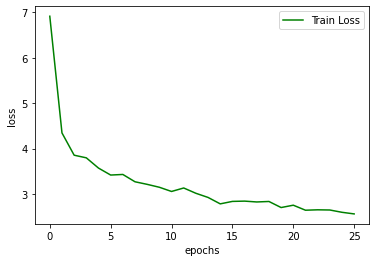

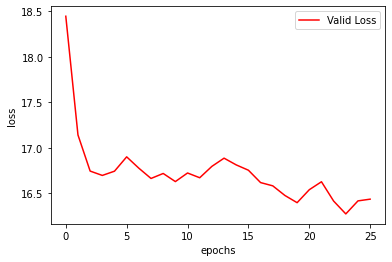


Epoch  26  completed! 
Train loss is:  tensor(2.5620, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.4348, device='cuda:0')


____________________________________________________________________


Running EPOCH :  27


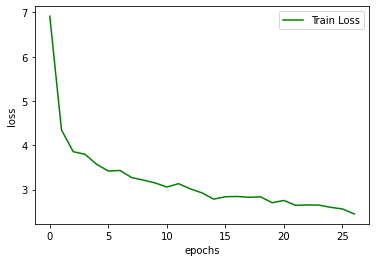

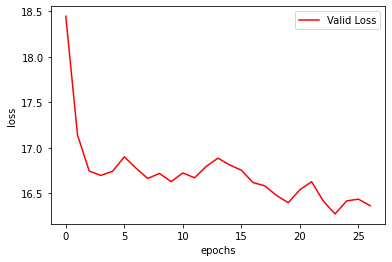


Epoch  27  completed! 
Train loss is:  tensor(2.4496, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.3629, device='cuda:0')


____________________________________________________________________


Running EPOCH :  28


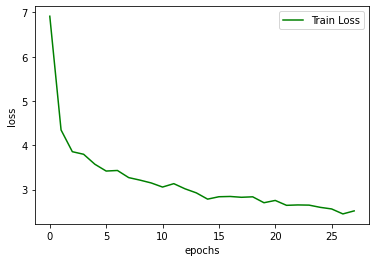

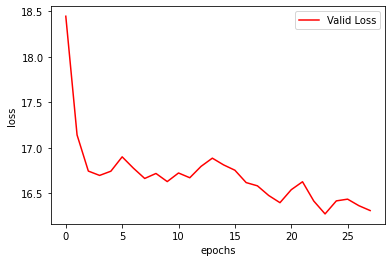


Epoch  28  completed! 
Train loss is:  tensor(2.5180, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.3094, device='cuda:0')


____________________________________________________________________


Running EPOCH :  29


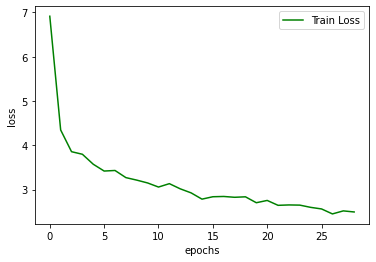

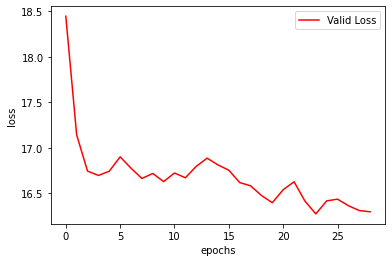


Epoch  29  completed! 
Train loss is:  tensor(2.4936, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2957, device='cuda:0')


____________________________________________________________________


Running EPOCH :  30


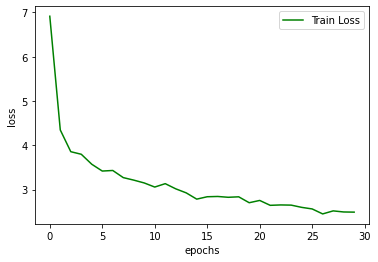

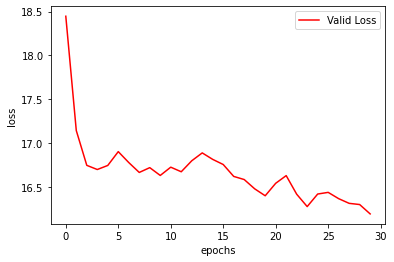


Epoch  30  completed! 
Train loss is:  tensor(2.4897, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.1886, device='cuda:0')


____________________________________________________________________


Running EPOCH :  31


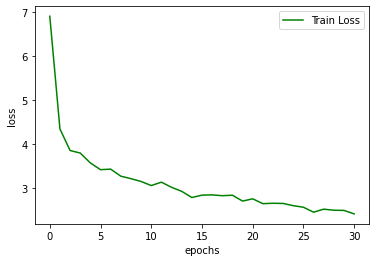

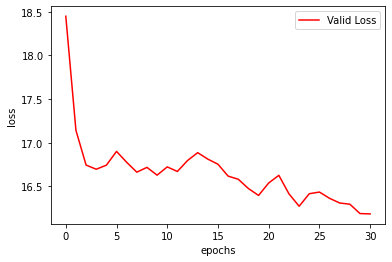


Epoch  31  completed! 
Train loss is:  tensor(2.4098, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.1845, device='cuda:0')


____________________________________________________________________


Running EPOCH :  32


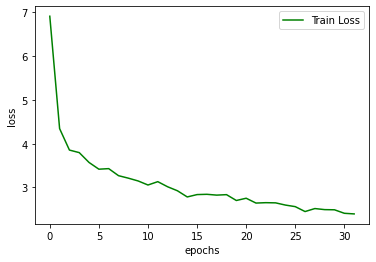

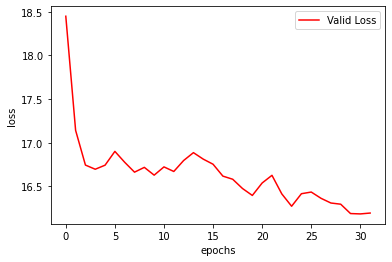


Epoch  32  completed! 
Train loss is:  tensor(2.3955, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.1943, device='cuda:0')


____________________________________________________________________


Running EPOCH :  33


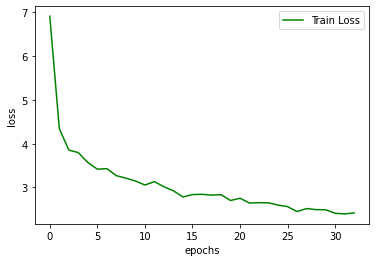

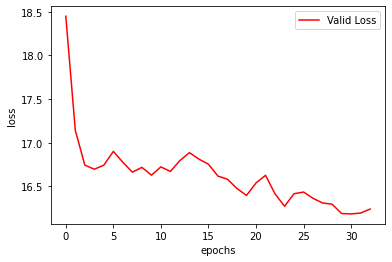


Epoch  33  completed! 
Train loss is:  tensor(2.4200, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2403, device='cuda:0')


____________________________________________________________________


Running EPOCH :  34


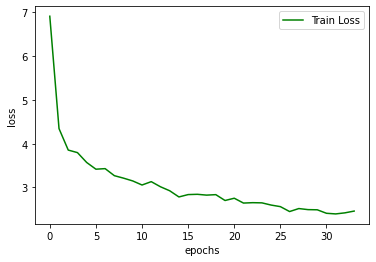

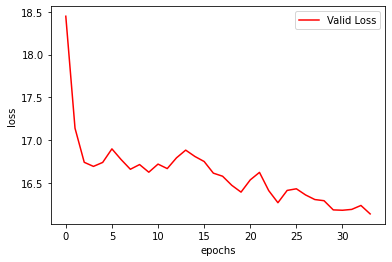


Epoch  34  completed! 
Train loss is:  tensor(2.4605, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.1417, device='cuda:0')


____________________________________________________________________


Running EPOCH :  35


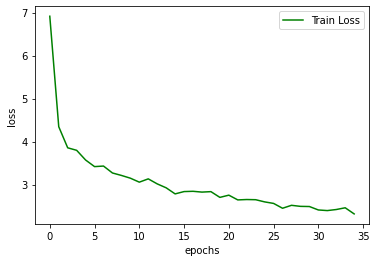

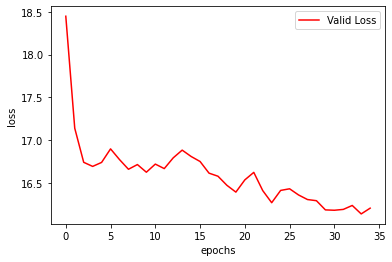


Epoch  35  completed! 
Train loss is:  tensor(2.3179, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2088, device='cuda:0')


____________________________________________________________________


Running EPOCH :  36


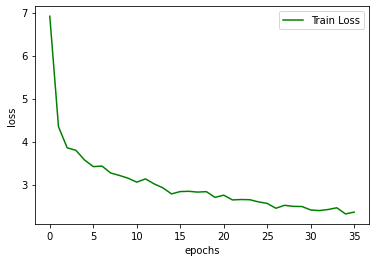

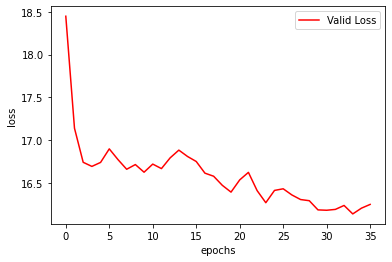


Epoch  36  completed! 
Train loss is:  tensor(2.3597, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2525, device='cuda:0')


____________________________________________________________________


Running EPOCH :  37


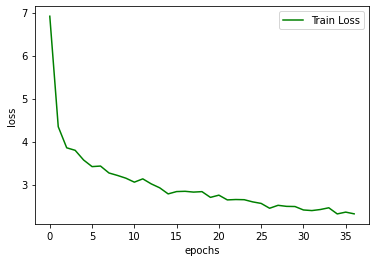

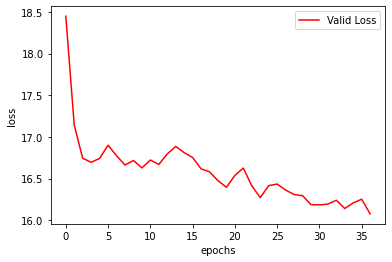


Epoch  37  completed! 
Train loss is:  tensor(2.3195, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.0766, device='cuda:0')


____________________________________________________________________


Running EPOCH :  38


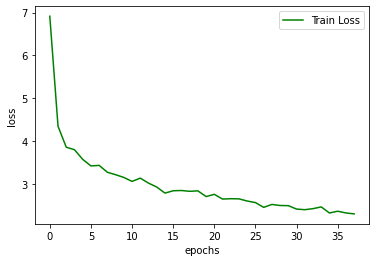

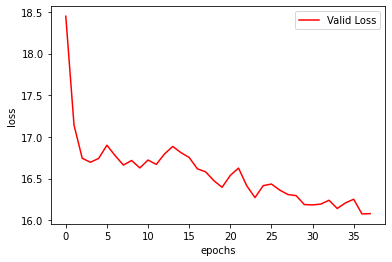


Epoch  38  completed! 
Train loss is:  tensor(2.2968, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.0798, device='cuda:0')


____________________________________________________________________


Running EPOCH :  39


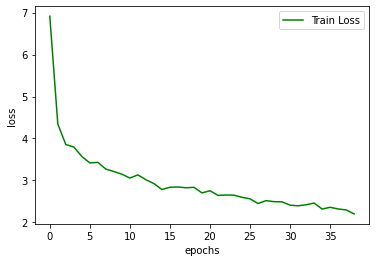

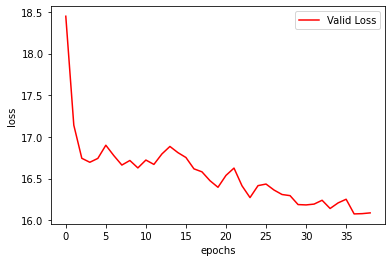


Epoch  39  completed! 
Train loss is:  tensor(2.2018, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.0889, device='cuda:0')


____________________________________________________________________


Running EPOCH :  40


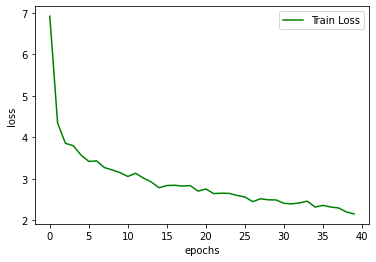

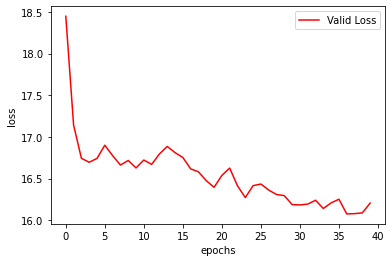


Epoch  40  completed! 
Train loss is:  tensor(2.1538, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2062, device='cuda:0')


____________________________________________________________________


Running EPOCH :  41


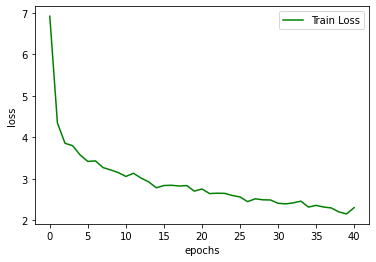

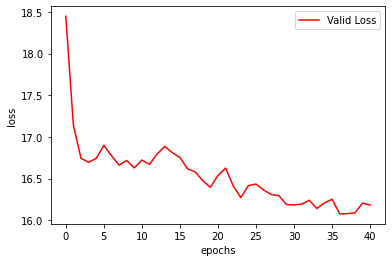


Epoch  41  completed! 
Train loss is:  tensor(2.3054, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.1836, device='cuda:0')


____________________________________________________________________


Running EPOCH :  42


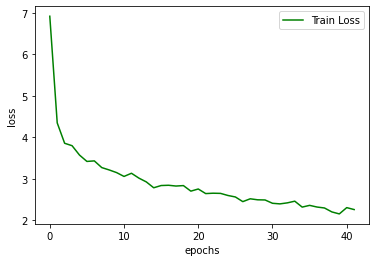

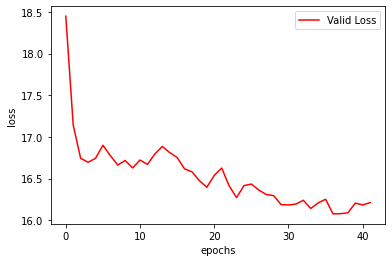


Epoch  42  completed! 
Train loss is:  tensor(2.2584, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.2124, device='cuda:0')


____________________________________________________________________


Running EPOCH :  43


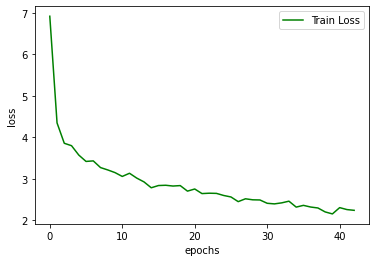

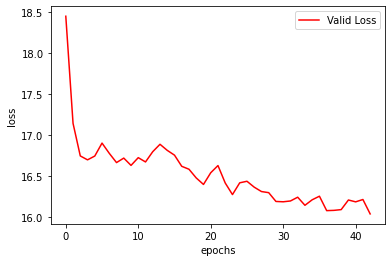


Epoch  43  completed! 
Train loss is:  tensor(2.2401, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(16.0365, device='cuda:0')


____________________________________________________________________


Running EPOCH :  44


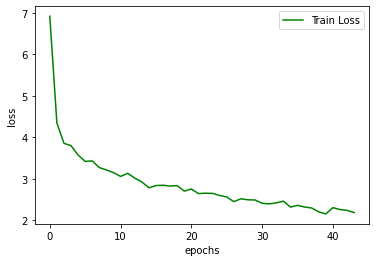

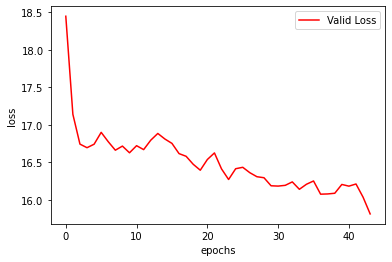


Epoch  44  completed! 
Train loss is:  tensor(2.1863, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(15.8136, device='cuda:0')


____________________________________________________________________


Running EPOCH :  45


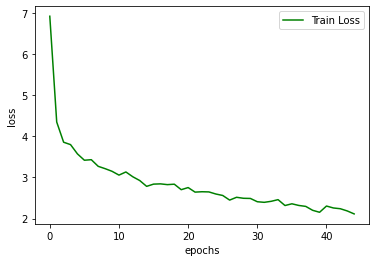

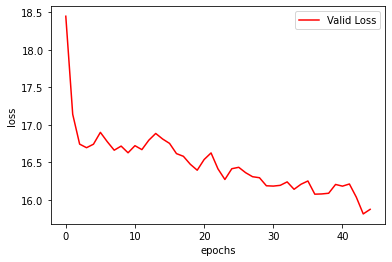


Epoch  45  completed! 
Train loss is:  tensor(2.1140, device='cuda:0', grad_fn=<DivBackward0>) 
Valid loss is:  tensor(15.8747, device='cuda:0')


____________________________________________________________________




In [32]:
while epoch < 45:

  trainloss = 0
  validloss = 0  
  print("Running EPOCH : ", epoch+1)
  """Training"""
  for local_batch, local_labels in tqdm(training_generator): 

    optimizer.zero_grad()

    """Forward Function Implementation"""
    input_ids = tokenizer.batch_encode_plus(local_batch, return_tensors="pt",pad_to_max_length=True)
    label = tokenizer.batch_encode_plus(local_labels, return_tensors="pt",pad_to_max_length=True)
    model.train()
    outputs = model(input_ids=(input_ids['input_ids']).to(device), lm_labels=(label['input_ids']).to(device),attention_mask=(input_ids['attention_mask']).to(device))
    loss = outputs[0]
    """Forward Function Ends here"""

    """Loss and optimizer"""
    loss.backward()
    optimizer.step()

    trainloss += loss

  trainloss = trainloss/len(training_generator)
  loss_train.append(trainloss)

  """Validation"""
  with torch.set_grad_enabled(False):
    for local_batch, local_labels in tqdm(validation_generator):
      input_ids = tokenizer.batch_encode_plus(local_batch, return_tensors="pt",pad_to_max_length=True)
      label = tokenizer.batch_encode_plus(local_labels, return_tensors="pt",pad_to_max_length=True)
      model.eval()
      outputs = model(input_ids=(input_ids['input_ids']).to(device), lm_labels=(label['input_ids']).to(device))
      validloss += outputs[0]
  validloss = validloss / len(validation_generator)
  loss_valid.append(validloss)

  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.plot(loss_train, color='green', label="Train Loss")
  plt.legend()
  plt.show()
  
  plt.xlabel("epochs")
  plt.ylabel("loss")
  plt.plot(loss_valid, color='red', label="Valid Loss")
  plt.legend()
  plt.show()

  print("\nEpoch ", epoch+1, " completed! \nTrain loss is: ", trainloss, "\nValid loss is: ", validloss)
  print("\n\n____________________________________________________________________\n\n")
  
  """Save states"""
  states = {
          'epoch': epoch + 1,
          'state_dict': model.state_dict(),
          'optimizer': optimizer.state_dict(),
          'trainloss': loss_train,
          'validloss': loss_valid
      }
  torch.save(states, "models/" + model_path)
  #torch.save(states, "models/AfterEpoch_" + str(epoch+1) + "_" + model_path)

  epoch += 1

## Load Test Data

In [ ]:
X_test,Y_test = [],[]
file=open("test/test.token.sbt")
for line in file:
  X_test.append(line)
file=open("test/test.token.nl")
for line in file:
  Y_test.append(line)

print(len(X_test))
  
# Data loader for test set
test_set = Dataset(X_test,Y_test)
test_generator = data.DataLoader(test_set, **params)

20000


## Make target and predicted list

In [ ]:
refs_list = []
hyp_list = []

with torch.set_grad_enabled(False):
  for local_batch, local_labels in tqdm(test_generator):
    input_ids = tokenizer.batch_encode_plus(local_batch, return_tensors="pt",pad_to_max_length=True)
    
    model.eval()
    predY = model.generate(input_ids=(input_ids['input_ids']).to(device))
    
    for i,j in zip(predY, local_labels):
      hyp_list.append(tokenizer.decode(i))
      refs_list.append(j)

In [ ]:
precision, recall, f1 = utils.calculate_results(refs_list, hyp_list)
print("Precision: ", precision)
print("Recall: ", recall)
print("f1: ", f1)

Precision:  0.21233411397345825
Recall:  0.1578641903656413
f1:  0.1810918774966711


In [ ]:
print(refs_list[20])
print(hyp_list[20])

encodes everything of a query parameter name or value .

returns a string representation of the given url.
